Code used for creating Fig. 2 in [New Journal of Physics 20, 043034 (2018)](https://dx.doi.org/10.1088/1367-2630/aaba02)
----
Models the interaction between a harmonic oscillator WM and a ring of harmonic oscillators initialized in a thermal state. After the interaction the effective temperature of the WM is computed.

authors:     Alejandro Pozas-Kerstjens, Karen V. Hovhanissyan,
             Eric G. Brown

requires:    NumPy, SciPy, Matplotlib

last update: Sep, 2017

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np
import scipy.linalg

from functions import *

Choice of parameters
-----------

In [2]:
# WM frequency
Om       = 2

# Bath frequency
Ob       = 2

# Interaction strength with the bath
gamma    = 0.1

# Nearest-neighbor ring coupling strength
alpha    = 0.1

# Bath and WM temperature
Tb       = 4
Tm       = 0.5

# Number of modes in the bath
N        = np.linspace(2, 20, 19)

# Time of interaction with the bath; must be at least 2*delta
tf       = np.linspace(1, 200, 200)

# Set of bath modes with which the WM interacts
interact = 1

Computations
-----

In [3]:
# Initial detector state
sigDetI = np.eye(2) * (np.exp(Om / Tm) + 1) / (np.exp(Om / Tm) - 1)
Teff    = np.zeros((len(tf), len(N)))

for i, n in enumerate(N):
    for j, time in enumerate(tf):
        n      = int(n)
        # Bath oscillators' frequencies
        freqs  = Ob * np.ones(n)
        
        # Baths' nearest-neighbour couplings
        alphas = alpha * np.ones(n - 1)
        
        # Ramp-up time; want it to be large compared to inverse WM's
        # frequency so as to remain approximately adiabatic
        delta  = 0.1 * time
        
        # Bath free Hamiltonian.
        Ffree  = FreeRing(n, freqs, alphas)
        
        # Initialize global state of the system (WM plus bath)
        sigI   = scipy.linalg.block_diag(sigDetI, Initialize(n, Tb, Ffree))
                
        # Initialize time steps for numerical integrations
        dt     = 0.01
        steps  = int(np.floor(time / dt))
        dt     = time / steps    # Recompute dt to account for rounding
        t      = np.linspace(0, time, steps)
        lambd  = Switching(t, delta)
        
        # Compute the symplectic evolution for the interaction.
        S      = MakeStimeIndep(n, Om, gamma, interact, t, delta, lambd, Ffree)
        sigF   = dot(S, dot(sigI, S.T))
        
        # Compute WM's temperature
        sigDetF    = sigF[:2, :2]
        eigen      = scipy.linalg.eigvals(sigDetF)
        nu         = np.sqrt(np.prod(eigen))
        
        Teff[j, i] = Om / (np.log((nu + 1) / (nu - 1)))

c:\python\python35\lib\site-packages\ipykernel_launcher.py:40: ComplexWarning: Casting complex values to real discards the imaginary part


Plots
----

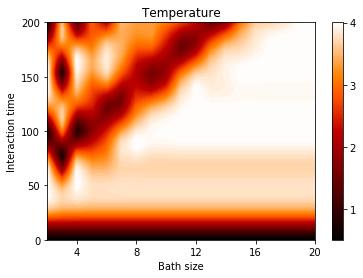

In [4]:
X, Y     = np.meshgrid(N, tf)
cmap     = plt.get_cmap('gist_heat')
levels   = np.linspace(Teff.min(), Teff.max(), 100)
contplot = plt.contourf(X, Y, Teff, cmap=cmap, levels=levels)
cb       = plt.colorbar(contplot)

plt.xlabel('Bath size')
plt.ylabel('Interaction time')
plt.title('Temperature')

frame1  = plt.gca()
frame1.axes.xaxis.set_ticks([4, 8, 12, 16, 20])
frame1.axes.yaxis.set_ticks([0, 50, 100, 150, 200])
cb.set_ticks([1, 2, 3, 4])
for c in contplot.collections:
    c.set_edgecolor("face")
plt.show()